In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
data = pd.read_csv("D:\ExcelR\Assignment\Multi Linear Regression\Fifty_Startups.csv")
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [5]:
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


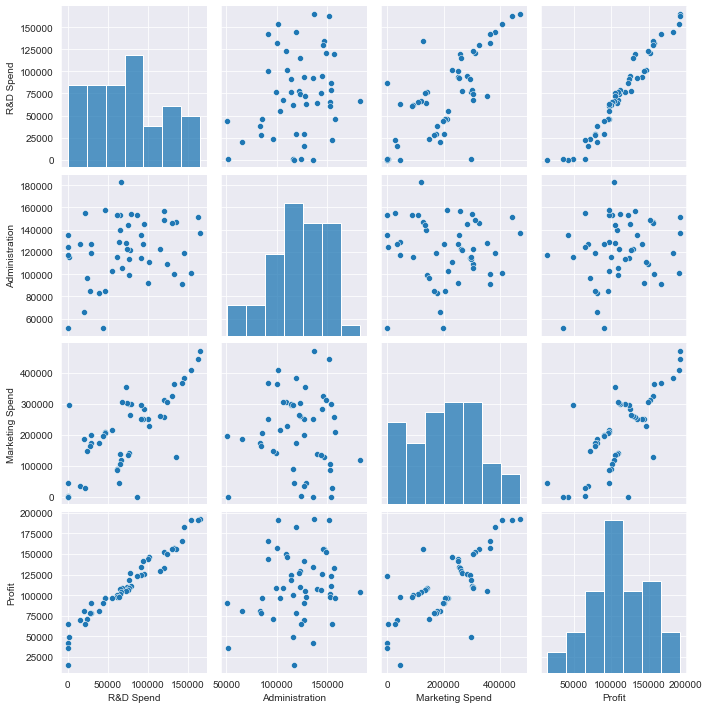

In [6]:
sns.set_style(style='darkgrid')
sns.pairplot(data)

In [7]:
data1 = data.rename({'R&D Spend':'RDS','Marketing Spend':'MKS'},axis=1)

In [8]:
data1.head()

,RDS,Administration,MKS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [9]:
model = smf.ols('Profit~RDS+Administration+MKS',data=data1).fit()

In [10]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Fri, 11 Feb 2022   Prob (F-statistic):           4.53e-30
Time:                        18:54:13   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RDS                0.8057      0.045     17.846      0.000       0.715       0.897
Administration    -0.0268      0.051     -0.526      0.602      -0.130       0.076
MKS                0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
model.params

Intercept         50122.192990
RDS                   0.805715
Administration       -0.026816
MKS                   0.027228
dtype: float64

In [12]:
print(model.tvalues , '\n' , model.pvalues)

Intercept          7.626218
RDS               17.846374
Administration    -0.525507
MKS                1.655077
dtype: float64 
 Intercept         1.057379e-09
RDS               2.634968e-22
Administration    6.017551e-01
MKS               1.047168e-01
dtype: float64


In [13]:
model.rsquared,model.rsquared_adj

(0.9507459940683246, 0.9475337762901719)

## SLR

In [14]:
ml_a = smf.ols('Profit~Administration',data=data1).fit()
print(ml_a.tvalues, '\n' ,ml_a.pvalues)

Intercept         3.040044
Administration    1.419493
dtype: float64 
 Intercept         0.003824
Administration    0.162217
dtype: float64


In [15]:
ml_b = smf.ols('Profit~MKS',data=data1).fit()
print(ml_b.tvalues, '\n' ,ml_b.pvalues)

Intercept    7.808356
MKS          7.802657
dtype: float64 
 Intercept    4.294735e-10
MKS          4.381073e-10
dtype: float64


In [16]:
ml_ab = smf.ols('Profit~Administration+MKS',data=data1).fit()
print(ml_ab.tvalues, '\n' ,ml_ab.pvalues)

Intercept         1.142741
Administration    2.467779
MKS               8.281039
dtype: float64 
 Intercept         2.589341e-01
Administration    1.729198e-02
MKS               9.727245e-11
dtype: float64


#Calculating VIF

In [17]:
rsq_a = smf.ols('RDS~Administration+MKS',data=data1).fit().rsquared
vif_a = 1/(1-rsq_a)

rsq_b = smf.ols('Administration~RDS+MKS',data=data1).fit().rsquared
vif_b = 1/(1-rsq_b)

rsq_c = smf.ols('MKS~RDS+Administration',data=data1).fit().rsquared
vif_c = 1/(1-rsq_c)

df1 = {'Variables':['RDS','Administration','MKS'],'VIF':[vif_a,vif_b,vif_c]}
Vif_frame = pd.DataFrame(df1)
Vif_frame

,Variables,VIF
0,RDS,2.468903
1,Administration,1.175091
2,MKS,2.326773


#Residual Analysis

Test for normality q-q plot

C:\Users\Mukta\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


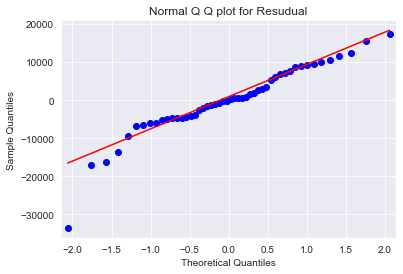

In [18]:
import statsmodels.api as sm
qqplot = sm.qqplot(model.resid,line='q')
plt.title('Normal Q Q plot for Resudual')
plt.show()

In [19]:
list(np.where(model.resid<-30000))

[array([49], dtype=int64)]

In [20]:
def get_standardized_values( vals ):
  return (vals - vals.mean())/vals.std()

In [21]:
from matplotlib import pyplot as plt


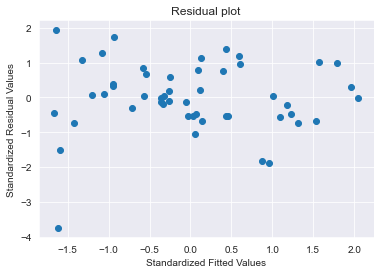

In [22]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

Residual VS Regressors

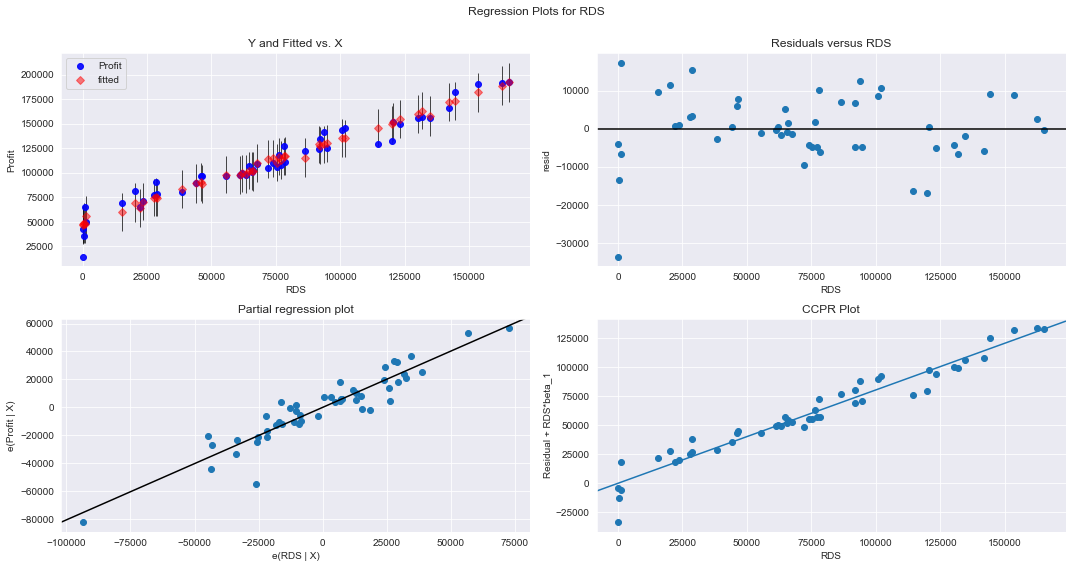

In [23]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RDS", fig=fig)
plt.show()

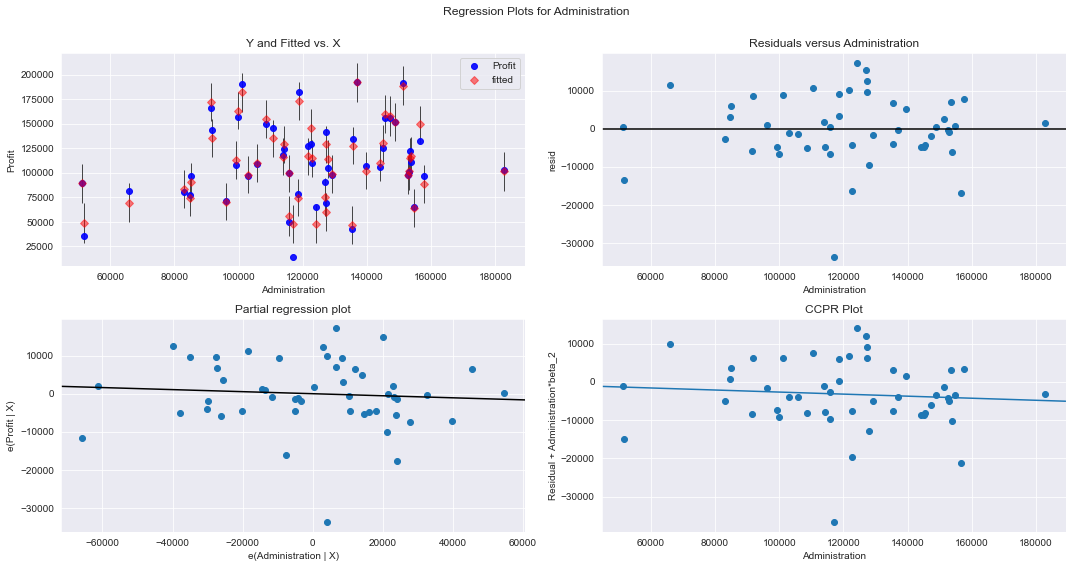

In [24]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Administration", fig=fig)
plt.show()

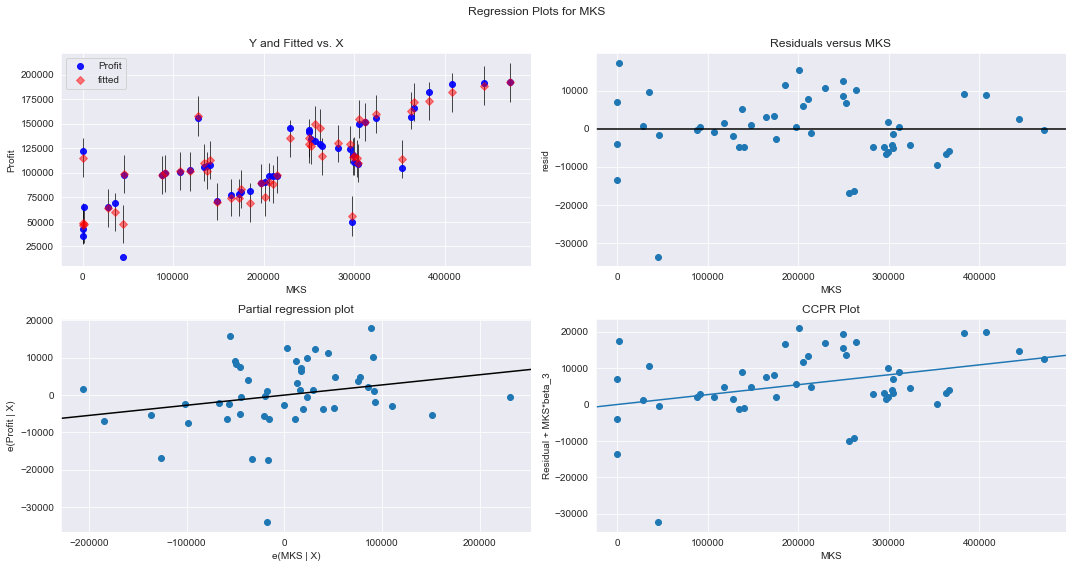

In [25]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "MKS", fig=fig)
plt.show()

Cook's Distance

In [26]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

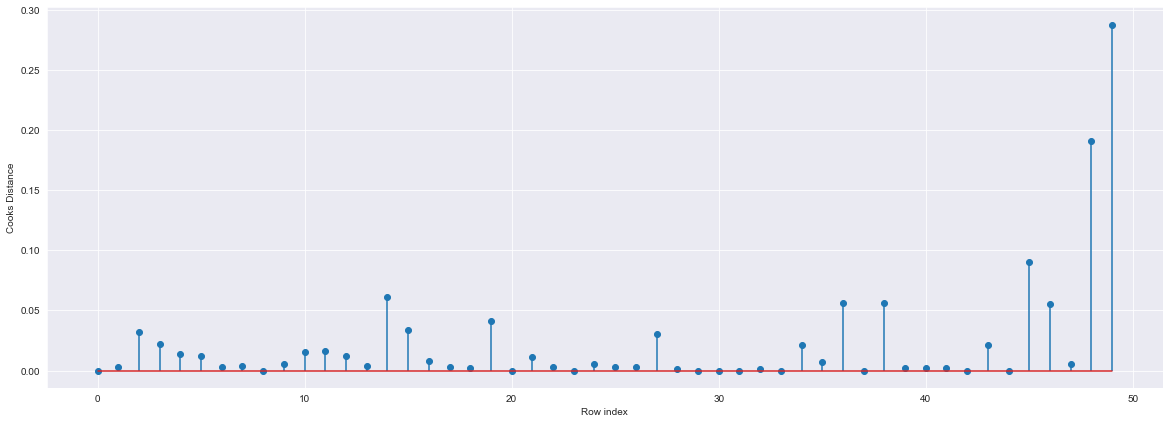

In [27]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [28]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.28808229275432634)

Leverage Value Using High Influence Point

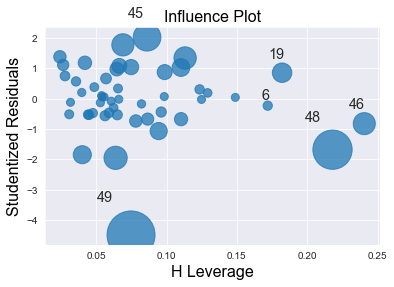

In [29]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [30]:
k = data1.shape[1]
n = data1.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [31]:
leverage_cutoff

0.36

In [32]:
data1[data1.index.isin([49])]

,RDS,Administration,MKS,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


Improving the Model

In [33]:
#Discard the data points which are influencers and reasign the row number (reset_index())
data2=data1.drop(data1.index[[49]],axis=0).reset_index()

In [34]:
data2=data2.drop(['index'],axis=1)

In [35]:
data2

,RDS,Administration,MKS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [36]:
while np.max(c)>0.5 :
    model=smf.ols("Profit~RDS+Administration+MKS",data=data2).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    data2=data2.drop(data2.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    data2
else:
    final_model=smf.ols("Profit~RDS+Administration+MKS",data=data2).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.9613162435129847


In [37]:
final_model.rsquared

0.9613162435129847

In [38]:
new_data = pd.DataFrame({'RDS':60000, 'Administration':80000, 'MKS':130000},index=[0])

In [39]:
new_data

,RDS,Administration,MKS
0,60000,80000,130000


In [40]:
final_model.predict(new_data)

0    100866.813454
dtype: float64

## Table Containing R^2 value for each prepared model

In [41]:
final = {'Prep_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,final_model.rsquared]}

In [42]:
table = pd.DataFrame(final)

In [43]:
table

,Prep_Models,Rsquared
0,Model,0.950746
1,Final_Model,0.961316
